# ISYE6501x Homework 6
Done By: Joel Quek

---

## Question 9.1

Using the same crime data set uscrime.txt as in Question 8.2, apply Principal Component Analysis and then create a regression model using the first few principal components.  Specify your new model in terms of the original variables (not the principal components), and compare its quality to that of your solution to Question 8.2.  You can use the R function **prcomp** for PCA. (Note that to first scale the data, you can include scale. = TRUE to scale as part of the PCA function. Don’t forget that, to make a prediction for the new city, you’ll need to unscale the coefficients (i.e., do the scaling calculation in reverse)!)


---

### Import Dataset and Libraries

In [13]:
install.packages("pls")

Installing package into 'C:/Users/redoc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\redoc\AppData\Local\Temp\RtmpMv7nPz\downloaded_packages


In [49]:
install.packages("corrr")

Installing package into 'C:/Users/redoc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'TSP', 'qap', 'gclus', 'ca', 'registry', 'seriation'




package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'ca' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'seriation' successfully unpacked and MD5 sums checked
package 'corrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\redoc\AppData\Local\Temp\RtmpMv7nPz\downloaded_packages


In [50]:
install.packages("ggcorrplot")

Installing package into 'C:/Users/redoc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\redoc\AppData\Local\Temp\RtmpMv7nPz\downloaded_packages


In [57]:
install.packages("devtools")

Installing package into 'C:/Users/redoc/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\redoc\AppData\Local\Temp\RtmpMv7nPz\downloaded_packages


---

In [1]:
library(ggplot2)
library(pls)
library(corrr)
library(ggcorrplot)


Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings




In [2]:
crime <- read.table("uscrime.txt", header=TRUE)

In [3]:
head(crime)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
3,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
4,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
5,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
6,12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


---

### Principal Component Analysis (PCA)

Source 1 (Stat Quest): https://www.youtube.com/watch?v=0Jp4gsfOLMs </br>
Source 2 (Categorical Output): https://www.youtube.com/watch?v=xKl4LJAXnEA </br>
Source 3 (Principal Component Regression): https://www.youtube.com/watch?v=H45NWCzIDkY </br>
I learnt how to perform PCA with R from these videos.

Other Good Sources for Learning

https://stats.stackexchange.com/questions/144508/conclusions-from-output-of-a-principal-component-analysis

http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/118-principal-component-analysis-in-r-prcomp-vs-princomp/

In [4]:
# Run PCA on all columns except "Crime"
pca<-prcomp(crime[,-16],scale=TRUE) 

In [5]:
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

**Note**: From the summary we can see that the **proportion of variance** for PC1, 2 and 3 are very high compared to the rest of the PCs.

In [6]:
pca

Standard deviations (1, .., p=15):
 [1] 2.45335539 1.67387187 1.41596057 1.07805742 0.97892746 0.74377006
 [7] 0.56729065 0.55443780 0.48492813 0.44708045 0.41914843 0.35803646
[13] 0.26332811 0.24180109 0.06792764

Rotation (n x k) = (15 x 15):
               PC1         PC2           PC3         PC4         PC5
M      -0.30371194  0.06280357  0.1724199946 -0.02035537 -0.35832737
So     -0.33088129 -0.15837219  0.0155433104  0.29247181 -0.12061130
Ed      0.33962148  0.21461152  0.0677396249  0.07974375 -0.02442839
Po1     0.30863412 -0.26981761  0.0506458161  0.33325059 -0.23527680
Po2     0.31099285 -0.26396300  0.0530651173  0.35192809 -0.20473383
LF      0.17617757  0.31943042  0.2715301768 -0.14326529 -0.39407588
M.F     0.11638221  0.39434428 -0.2031621598  0.01048029 -0.57877443
Pop     0.11307836 -0.46723456  0.0770210971 -0.03210513 -0.08317034
NW     -0.29358647 -0.22801119  0.0788156621  0.23925971 -0.36079387
U1      0.04050137  0.00807439 -0.6590290980 -0.18279096 -0.1313

**Question**: What do each line of each PC mean? I think they are the Eigenvalues

---

### Outputs of prcomp()

prcomp() returns 3 outputs
- sdev
- x
- rotation (or 'loadings')

#### Output: sdev

In [19]:
pca.var<-pca$sdev^2

In [20]:
pca.var

[1] 6.018952657 2.801847026 2.004944334 1.162207801 0.958298972 0.553193900
 [7] 0.321818687 0.307401270 0.235155292 0.199880931 0.175685403 0.128190107
[13] 0.069341691 0.058467765 0.004614165

In [21]:
# changing the pca variance values to percentages
pca.var.per<-round(pca.var/sum(pca.var)*100,1)

In [22]:
pca.var.per

[1] 40.1 18.7 13.4  7.7  6.4  3.7  2.1  2.0  1.6  1.3  1.2  0.9  0.5  0.4  0.0

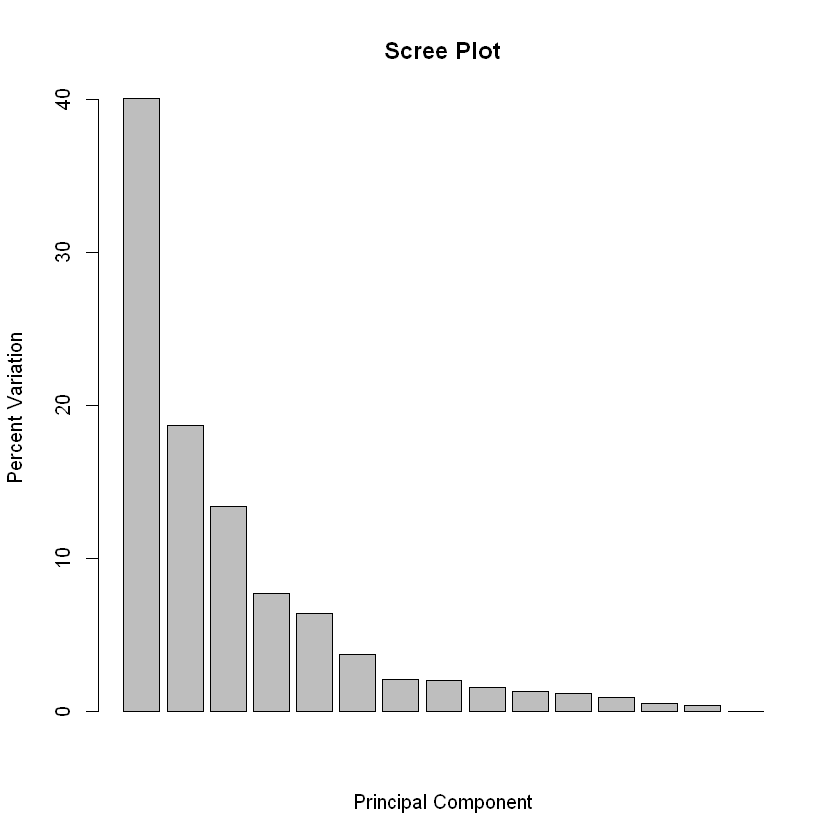

In [23]:
barplot(pca.var.per, main="Scree Plot", xlab="Principal Component",ylab="Percent Variation")

Changing the Scree plot in terms of multiples of variance

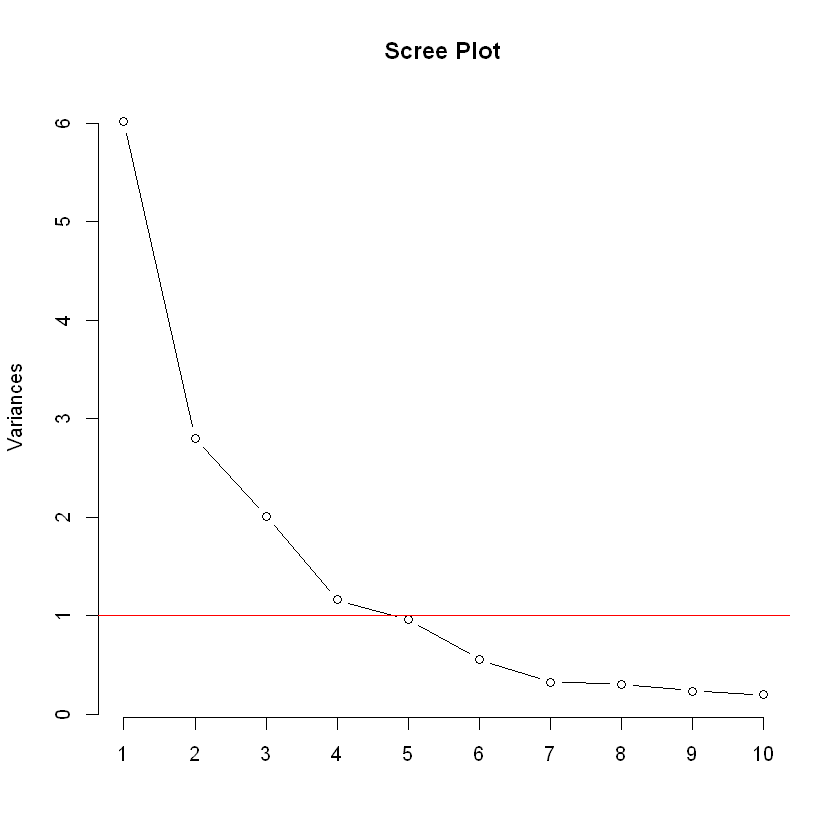

In [9]:
screeplot(pca, main="Scree Plot", type="line")
abline(h=1, col="red")

We can see from the variance plot that PC 1 accounts for almost all of the variation in the data.

Interpret the above scree plot the same way we interpret an elbow plot. I would choose the first 4 Principal Components of the model.

---

#### Output: X
x contains the principal components (PCs) for drawing a graph. The first PC accounts for the most variation in the original data, the 2nd PC accounts for the second most variation and so on.

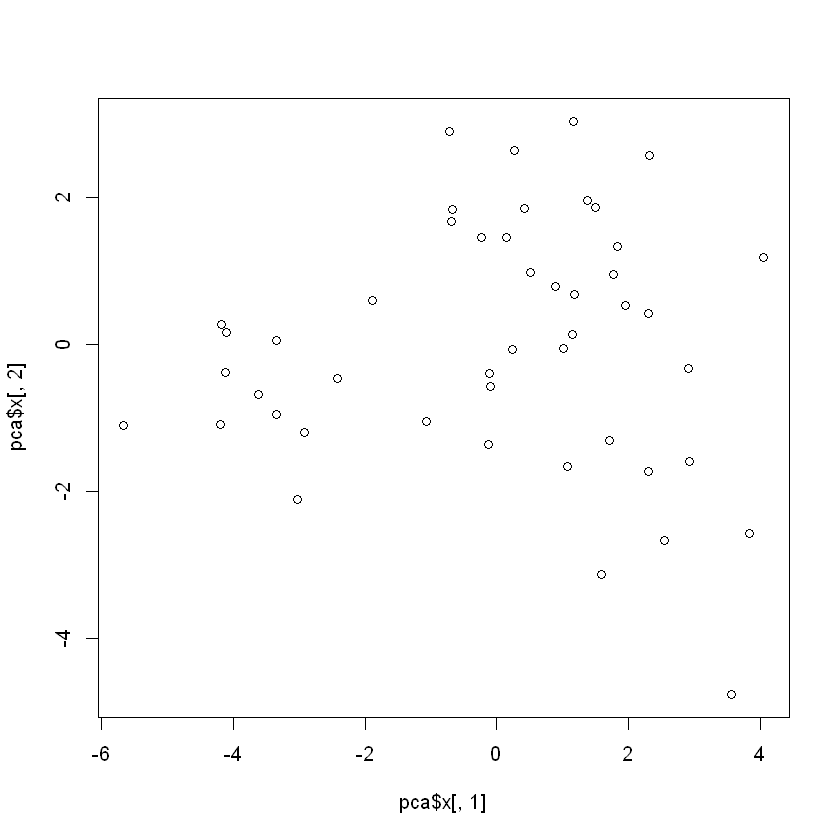

In [18]:
plot(pca$x[,1],pca$x[,2])

In [10]:
# Combine the x values of the first 4 Principal Components with the "Crime" column
pca_crime <- cbind(pca$x[,1:4],crime[,16])

In [12]:
head(pca_crime)

PC1,PC2,PC3,PC4,
-4.199284,-1.0938312,-1.11907395,0.67178115,791
1.172663,0.6770136,-0.05244634,-0.08350709,1635
-4.173725,0.2767750,-0.37107658,0.37793995,578
3.834962,-2.5769060,0.22793998,0.38262331,1969
1.839300,1.3309856,1.27882805,0.71814305,1234
2.907234,-0.3305421,0.53288181,1.22140635,682


In [14]:
# Now create a Linear Regression model using the x outputs of the PCs with the "Crime" columns. Column 5 in "pca_crime"
model <- lm(V5~., data = as.data.frame(pca_crime))
summary(model)


Call:
lm(formula = V5 ~ ., data = as.data.frame(pca_crime))

Residuals:
    Min      1Q  Median      3Q     Max 
-557.76 -210.91  -29.08  197.26  810.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      49.07  18.443  < 2e-16 ***
PC1            65.22      20.22   3.225  0.00244 ** 
PC2           -70.08      29.63  -2.365  0.02273 *  
PC3            25.19      35.03   0.719  0.47602    
PC4            69.45      46.01   1.509  0.13872    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 336.4 on 42 degrees of freedom
Multiple R-squared:  0.3091,	Adjusted R-squared:  0.2433 
F-statistic: 4.698 on 4 and 42 DF,  p-value: 0.003178


---

### Prediction 1

In [15]:
pred_input <- data.frame(M= 14.0, So = 0, Ed = 10.0, Po1 = 12.0, Po2 = 15.5,
                    LF = 0.640, M.F = 94.0, Pop = 150, NW = 1.1, U1 = 0.120, U2 = 3.6, Wealth = 3200, Ineq = 20.1, Prob = 0.040,Time = 39.0)

In [16]:
pred_df <- data.frame(predict(pca, pred_input)) 

In [17]:
pred <- predict(model, pred_df)

In [18]:
pred

1 
1112.678

**My prediction of 1112 using PCA (using 4 PCs) is close to the prediction of 1304 using Linear Regression.**

---

### Prediction 2

With the benefit of hindsight, I am calculating a second prediction using the first 5 Principal Components.

In [22]:
# Combine the x values of the first 4 Principal Components with the "Crime" column
pca_crime2 <- cbind(pca$x[,1:5],crime[,16])
# Now create a Linear Regression model using the x outputs of the PCs with the "Crime" columns. Column 5 in "pca_crime"
model2 <- lm(V6~., data = as.data.frame(pca_crime2))
summary(model2)

pred_df2 <- data.frame(predict(pca, pred_input)) 

pred <- predict(model2, pred_df2)

pred


Call:
lm(formula = V6 ~ ., data = as.data.frame(pca_crime2))

Residuals:
    Min      1Q  Median      3Q     Max 
-420.79 -185.01   12.21  146.24  447.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      35.59  25.428  < 2e-16 ***
PC1            65.22      14.67   4.447 6.51e-05 ***
PC2           -70.08      21.49  -3.261  0.00224 ** 
PC3            25.19      25.41   0.992  0.32725    
PC4            69.45      33.37   2.081  0.04374 *  
PC5          -229.04      36.75  -6.232 2.02e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 244 on 41 degrees of freedom
Multiple R-squared:  0.6452,	Adjusted R-squared:  0.6019 
F-statistic: 14.91 on 5 and 41 DF,  p-value: 2.446e-08


1 
1388.926

**My second prediction of 1388 using PCA (using 5 PCs) is much closer to the prediction of 1304 using Linear Regression.**

---